<font size=5>Machine Learning Model Diagnostics and Validation</font>

Updated on July 22, 2022

This demo (based on TaiwanCredit data, a classification task) covers: 

- Accuracy, WeakSpot and Overfit

- Reliability Testing

- Robustness and Resilience Testing

- Model Comparison and Benchmarking


# Install PiML Toolbox

- Run `!pip install piml` to install the latest version of PiML.
- In Google Colab, we need restart the runtime in order to use newly installed version.

In [ ]:
!pip install PiML

In [1]:
!pip show PiML

Name: PiML
Version: 0.2.2
Summary: A low-code interpretable machine learning toolbox in Python.
Home-page: https://github.com/SelfExplainML/PiML-Toolbox
Author: Sudjianto, Agus and Zhang, Aijun and Yang, Zebin and Su, Yu and Zeng, Ningzhou and Nair, Vijay
Author-email: None
License: Apache
Location: /usr/local/lib/python3.7/dist-packages
Requires: lightgbm, scipy, lime, joblib, ipython, shap, statsmodels, PyALE, pygam, ipywidgets, matplotlib, xlrd, scikit-learn, opendatasets, pandas, seaborn, torch, xgboost, numpy
Required-by: 


# Load and Prepare Data

- Initilaize a new experiment by `piml.Experiment()`
- Low-code interactive interface, or
- High-code autorun scripts (optional)  

In [2]:
from piml import Experiment
exp = Experiment()

## Low-code Interface

In [ ]:
# Choose TaiwanCredit
exp.data_loader()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

In [ ]:
# Use only payment history attributes: Pay_1~6, BILL_AMT1~6 and PAY_AMT1~6 (i.e., exclude all others)
# Keep the response `FlagDefault`
exp.data_summary()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value='<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.…

In [ ]:
exp.data_prepare()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

In [ ]:
exp.eda()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

## High-code Scripts (optional)

In [20]:
exp.data_loader(data='TaiwanCredit')

exp.data_summary(feature_type={}, feature_exclude=["SEX", "EDUCATION", "MARRIAGE", "AGE", "LIMIT_BAL"])

exp.data_prepare(target='FlagDefault', task_type='Classification', test_ratio=0.2, random_state=0)

exp.eda(show='all', uni_feature='PAY_1', bi_features=['PAY_1', 'BILL_AMT1'],  multi_type='correlation_heatmap')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,FlagDefault
0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,0.0,...,0.000000,0.000000,0.000000,0.000000,2.838849,0.000000,0.000000,0.000000,0.000000,1.0
1,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3.514946,3.538574,3.513484,0.000000,3.000434,3.000434,3.000434,0.000000,3.301247,1.0
2,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,4.156307,4.174612,4.191730,3.181558,3.176381,3.000434,3.000434,3.000434,3.699057,0.0
3,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,4.452017,4.461799,4.470528,3.301247,3.305351,3.079543,3.041787,3.029384,3.000434,0.0
4,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,4.320997,4.282101,4.281760,3.301247,4.564453,4.000043,3.954291,2.838849,2.832509,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,4.944508,4.494683,4.203604,3.929470,4.301052,3.699317,3.484015,3.699057,3.000434,0.0
29996,150000.0,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,3.953276,3.715251,0.000000,3.264345,3.547405,3.954194,2.113943,0.000000,0.000000,0.0
29997,30000.0,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,4.319710,4.313509,4.286860,0.000000,0.000000,4.342443,3.623353,3.301247,3.491502,1.0
29998,80000.0,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,0.0,...,4.722428,4.073938,4.689708,4.933998,3.532754,3.071514,3.284882,4.723989,3.256477,1.0


HTML(value='Data Shape:(30000, 24)')

,0,1
0,Inactive columns name,"[SEX, EDUCATION, MARRIAGE, AGE, LIMIT_BAL]"
1,Target colunm name,FlagDefault
2,Task type,Classification
3,Test ratio,0.2
4,Random state,0


<IPython.core.display.Javascript object>

# Train Black-Box Models

e.g. XGBoost (depth 5 with 500 trees)

In [21]:
from xgboost import XGBClassifier

clf = XGBClassifier(n_estimators=500, max_depth=5)
pipeline = exp.make_pipeline(clf)
pipeline.fit()
exp.register(pipeline=pipeline, name='XGBoost5')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value="<p class='notification info'>Register XGBoost5 Done</p>")

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

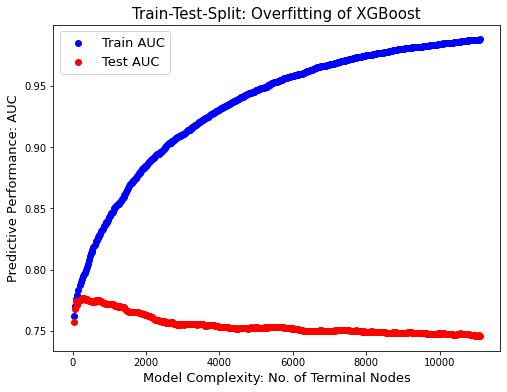

In [24]:
# XGBoost Overftting under train-test-split framework

import numpy as np
import pandas as pd
from matplotlib import pylab as plt
from sklearn.metrics import mean_squared_error, roc_auc_score

train_x, train_y = exp.get_model("XGBoost5").get_data(train=True)
test_x, test_y = exp.get_model("XGBoost5").get_data(test=True)

def score(clf, iteration_range):
    train_auc = roc_auc_score(train_y, clf.predict_proba(train_x, iteration_range=iteration_range)[:,1])
    test_auc = roc_auc_score(test_y, clf.predict_proba(test_x, iteration_range=iteration_range)[:, 1])
    tree_idx = np.logical_and(xgbinfo["Tree"] < iteration_range[1], xgbinfo["Tree"] >= iteration_range[0])
    n_leaves = np.sum(xgbinfo[tree_idx].loc[:, ["Feature"]].values == "Leaf")
    return {'n_leaves': n_leaves, 'train_auc': train_auc, 'test_auc': test_auc}

all_metrics = []
xgbinfo = clf.get_booster().trees_to_dataframe()
n_iter = 500
for i in range(n_iter):
    metrics = score(clf, (0, i + 1))
    all_metrics.append(metrics)
all_resluts = pd.DataFrame(all_metrics)

plt.figure(figsize=(8,6))
plt.scatter(all_resluts["n_leaves"], all_resluts["train_auc"], color="blue", label="Train AUC")
plt.scatter(all_resluts["n_leaves"], all_resluts["test_auc"], color="red", label="Test AUC")
plt.legend(fontsize=13)
# plt.yscale("log")
plt.ylabel("Predictive Performance: AUC", fontsize=13)
plt.xlabel("Model Complexity: No. of Terminal Nodes", fontsize=13)
plt.title("Train-Test-Split: Overfitting of XGBoost", fontsize=15)
plt.show()

In [23]:
# Choose XGBoost5, check Overfit
exp.model_diagnose()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

# Train Intepretable models: ReLU-DNNs

ReLU-DNN modeling with L1 Regularization Strength = 0.00001 vs. 0.0008

In [ ]:
# ----------------------------------
# Low-code Interface
# ----------------------------------

# Choose ReLU-DNN (default), Run; then customize Sparse-ReLU-DNN with L1-regularization = 0.0008
exp.model_train()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [25]:
# ----------------------------------
# High-code Scripts (optional)
# ----------------------------------

# ReLU-DNN: ReLU Deep Neural Networks (default parameters)
from piml.models import ReluDNNClassifier

clf = ReluDNNClassifier(hidden_layer_sizes=(40, 40), l1_reg=1e-05,
                        batch_size=500, learning_rate=0.001)
exp.model_train(model=clf, name='ReLU-DNN')
exp.model_diagnose(model="ReLU-DNN", show='accuracy_result')

# Sparse-ReLU-DNN: set L1-Regularization to be 0.0008
clf = ReluDNNClassifier(hidden_layer_sizes=(40, 40), l1_reg=0.0008,
                        batch_size=500, learning_rate=0.001)
exp.model_train(model=clf, name='Sparse-ReLU-DNN')
exp.model_diagnose(model="Sparse-ReLU-DNN", show='accuracy_result')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value="<p class='notification info'>Register ReLU-DNN Done</p>")

,,ACC,AUC,Recall,Precision,F1
0,Train,0.821125,0.776593,0.362427,0.685198,0.474090
1,Test,0.826667,0.770137,0.355436,0.693233,0.469929
2,Gap,0.005542,-0.006457,-0.006992,0.008035,-0.004162


HTML(value="<p class='notification info'>Register Sparse-ReLU-DNN Done</p>")

,,ACC,AUC,Recall,Precision,F1
0,Train,0.818792,0.762730,0.365612,0.66987,0.473040
1,Test,0.828167,0.766346,0.372398,0.69000,0.483726
2,Gap,0.009375,0.003616,0.006786,0.02013,0.010685


# Interpret/Explain

In [26]:
# Choose ReLU-DNN
exp.model_interpret()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [27]:
# Choose Sparse-ReLU-DNN
exp.model_interpret()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [28]:
# Choose ReLU-DNN or Sparse-ReLU-DNN, as well as arbitrary black-box models upon registration
exp.model_explain()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

# Diagnose/Compare

In [29]:
exp.model_diagnose()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [30]:
# Compare ReLU-DNN, Sparse-ReLU-DNN and XGBoost5
exp.model_compare()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>